### 1.Inspiration /Problem Statement:The goal is to do a thorough data analysis on the customer retention dataset and give findings & Conclusions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
import plotly.express as px
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
import time
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Customer Retention Project")

### 2. Data Loading and Description

#### Importing Dataset

In [3]:
# importing dataset into a dataframe object
New_df = pd.DataFrame(pd.read_excel("customer_retention_dataset.xlsx"))
# show the dataframe
pd.set_option('display.max_columns',None)
New_df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

In [4]:
New_df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [5]:
New_df.rename(columns={'1Gender of respondent':'Gender', '2 How old are you? ':'Age',
       '3 Which city do you shop online from?':'Shopping_city',
       '4 What is the Pin Code of where you shop online from?':'Pincode',
       '5 Since How Long You are Shopping Online ?':'Shopping_online_duration',
       '6 How many times you have made an online purchase in the past 1 year?':'Purchases_past_1_year',
       '7 How do you access the internet while shopping on-line?':'Internet_access',
       '8 Which device do you use to access the online shopping?':'Device',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'Screen_size',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'OS',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'Browser_used',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'Channel_to_reach_favorite_online_store_first_time',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'Reached_online_store_via',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'Time_taken_mo_make_purchase_decision_on_e-retail',
       '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'Preferred_payment_option',
       '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'Frequency_of_abandoning_shopping_cart',
       '17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'Reason_of_sbandoning_shopping_cart',
       '18 The content on the website must be easy to read and understand':'Clear_Content_On_Website',
       '19 Information on similar product to the one highlighted  is important for product comparison':'Information_on_similar_products_highlighted _is_important_for_product_comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'Complete_information_on_seller_&_product_is_important_for_purchase_decision',
       '21 All relevant information on listed products must be stated clearly':'Clarity_On_Product_Listed',
       '22 Ease of navigation in website':'Easy_Navigation_in_website', '23 Loading and processing speed':'Loading_&_processing_speed',
       '24 User friendly Interface of the website':'User_Friendly_Interface',
       '25 Convenient Payment methods':'Convenient_Payment_Methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Transaction_Fullfilment_On_Time',
       '27 Empathy (readiness to assist with queries) towards the customers':'Empathy_Towards_Customer',
       '28 Being able to guarantee the privacy of the customer':'Guarantee_of_privacy',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Availability_on_several_communication_channels',
       '30 Online shopping gives monetary benefit and discounts':'Online_shopping_gives_monetary_benefit_&_discounts',
       '31 Enjoyment is derived from shopping online':'Shopping_online_is_Fun',
       '32 Shopping online is convenient and flexible':'Online_shopping_is_convenient_&_flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return_&_replacement_policy_is_essential_for_purchase_decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'Online_Shopping_benefits_like_Getting_Access_to_Loyalty_Programs',
       '35 Displaying quality Information on the website improves satisfaction of customers':'Displaying_quality_Information_Improves_Customer_Satisfaction',
       '36 User derive satisfaction while shopping on a good quality website or application':'Good_quality_website_or_App_Gives_Customers_more_Satisfaction',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net_Benefit_from_online_shopping_gives_users_more_satisfaction',
       '38 User satisfaction cannot exist without trust':'Trust_is_essential_for_user_satisfaction',
       '39 Offering a wide variety of listed product in several category':'Offers_wide_variety_of_listed_product_in_several_category',
       '40 Provision of complete and relevant product information':'Provision_of_complete_&_relevant_product_information',
       '41 Monetary savings':'More_Monetary_savings',
       '42 The Convenience of patronizing the online retailer':'Convenience_of_patronizing_the_online_retailer',
       '43 Shopping on the website gives you the sense of adventure':'Shopping_on_website_gives_sense_of_adventure',
       '44 Shopping on your preferred e-tailer enhances your social status':'Shopping_on_your_preferred_e-tailer_enhances_your_social_status',
       '45 You feel gratification shopping on your favorite e-tailer':'More_gratification_feelings_shopping_on_favorite_e-tailer',
       '46 Shopping on the website helps you fulfill certain roles':'Shopping_on_the_website_helps_you_fulfill_certain_roles',
       '47 Getting value for money spent':'Value_for_money_spent',
       'From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ':'List_all_the_online_retailers_you_have_shopped_from',
       'Easy to use website or application':'Easy_to_use_website_or_application',
       'Visual appealing web-page layout':'Visual_appealing_web-page_layout', 'Wild variety of product on offer':'Wild_variety_of_product_on_offer',
       'Complete, relevant description information of products':'List_e-tailer_Displaying_relevant_information_of_products',
       'Fast loading website speed of website and application':'E-tailer_with_Fast_loading_website_&_application',
       'Reliability of the website or application':'Reliability_of_the_website_or_application',
       'Quickness to complete purchase':'Quickness_to_complete_purchase',
       'Availability of several payment options':'Availability_of_several_payment_options', 'Speedy order delivery ':'Speedy_order_delivery',
       'Privacy of customers’ information':'Privacy_on_customer_information',
       'Security of customer financial information':'Security_of_customer_financial_information',
       'Perceived Trustworthiness':'Perceived_Trustworthiness',
       'Presence of online assistance through multi-channel':'Multi-channel_assistance',
       'Longer time to get logged in (promotion, sales period)':'Longer_time_to_get_logged_in',
       'Longer time in displaying graphics and photos (promotion, sales period)':'Longer_time_in_displaying_graphics_and_photos',
       'Late declaration of price (promotion, sales period)':'Late_price_declaration',
       'Longer page loading time (promotion, sales period)':'Longer_page_loading_time',
       'Limited mode of payment on most products (promotion, sales period)':'Limited_mode_of_payment_on_most_products',
       'Longer delivery period':'Longer_delivery_period', 'Change in website/Application design':'Change_in_website_or_Application_design',
       'Frequent disruption when moving from one page to another':'Frequent_disruption_while_moving_from_page_to_page',
       'Website is as efficient as before':'Website_is_as_efficient_as_before',
       'Which of the Indian online retailer would you recommend to a friend?':'Recommend_online_Indian_retailer_to_a_friend'  }, 
                 inplace=True)

In [6]:
New_df.columns

Index(['Gender', 'Age', 'Shopping_city', 'Pincode', 'Shopping_online_duration',
       'Purchases_past_1_year', 'Internet_access', 'Device', 'Screen_size',
       'OS', 'Browser_used',
       'Channel_to_reach_favorite_online_store_first_time',
       'Reached_online_store_via',
       'Time_taken_mo_make_purchase_decision_on_e-retail',
       'Preferred_payment_option', 'Frequency_of_abandoning_shopping_cart',
       'Reason_of_sbandoning_shopping_cart', 'Clear_Content_On_Website',
       'Information_on_similar_products_highlighted _is_important_for_product_comparison',
       'Complete_information_on_seller_&_product_is_important_for_purchase_decision',
       'Clarity_On_Product_Listed', 'Easy_Navigation_in_website',
       'Loading_&_processing_speed', 'User_Friendly_Interface',
       'Convenient_Payment_Methods', 'Transaction_Fullfilment_On_Time',
       'Empathy_Towards_Customer', 'Guarantee_of_privacy',
       'Availability_on_several_communication_channels',
       'Online_sh

#### Dimensionality Check

In [7]:
New_df.shape

(269, 71)

##### Observation:The dataset consist of 269 observations of 71 columns.

### 3.Preprocessing data

* Renaming all the columns for better understanding of the dataset.
* Checking Missing Values.
* Displaying data types and their Unique values.
* Checking class imbalancement.
* Dropping insignigicant columns with less or no usefull data in it
* Transforming Data/Converting Categorical Columns into Numerical Column

In [8]:
# print all of the data types and their Unique values
for column in New_df.columns:
    if New_df[column].dtype == object:
        print(str(column)+ ':'+str(New_df[column].unique()))
        print(New_df[column].value_counts())
        print('---------------------------------------------------------------------------------------------')

Gender:['Male' 'Female']
Female    181
Male       88
Name: Gender, dtype: int64
---------------------------------------------------------------------------------------------
Age:['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64
---------------------------------------------------------------------------------------------
Shopping_city:['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Shopping_city, dtype: int64
---------------------------------------------------------------------------------------------
Shoppi

#### Checking Missing Values

In [9]:
pd.options.display.min_rows = 71
New_df.isnull().sum()

Gender                                                                              0
Age                                                                                 0
Shopping_city                                                                       0
Pincode                                                                             0
Shopping_online_duration                                                            0
Purchases_past_1_year                                                               0
Internet_access                                                                     0
Device                                                                              0
Screen_size                                                                         0
OS                                                                                  0
Browser_used                                                                        0
Channel_to_reach_favorite_online_store_first_time     

In [10]:
#### Checking for missing valuesif any
pd.options.display.min_rows = 71
New_df.isnull().any()

Gender                                                                              False
Age                                                                                 False
Shopping_city                                                                       False
Pincode                                                                             False
Shopping_online_duration                                                            False
Purchases_past_1_year                                                               False
Internet_access                                                                     False
Device                                                                              False
Screen_size                                                                         False
OS                                                                                  False
Browser_used                                                                        False
Channel_to

#### Observation: We can see that there are no missing values or missing data in any of the columns.

In [11]:
New_df.columns

Index(['Gender', 'Age', 'Shopping_city', 'Pincode', 'Shopping_online_duration',
       'Purchases_past_1_year', 'Internet_access', 'Device', 'Screen_size',
       'OS', 'Browser_used',
       'Channel_to_reach_favorite_online_store_first_time',
       'Reached_online_store_via',
       'Time_taken_mo_make_purchase_decision_on_e-retail',
       'Preferred_payment_option', 'Frequency_of_abandoning_shopping_cart',
       'Reason_of_sbandoning_shopping_cart', 'Clear_Content_On_Website',
       'Information_on_similar_products_highlighted _is_important_for_product_comparison',
       'Complete_information_on_seller_&_product_is_important_for_purchase_decision',
       'Clarity_On_Product_Listed', 'Easy_Navigation_in_website',
       'Loading_&_processing_speed', 'User_Friendly_Interface',
       'Convenient_Payment_Methods', 'Transaction_Fullfilment_On_Time',
       'Empathy_Towards_Customer', 'Guarantee_of_privacy',
       'Availability_on_several_communication_channels',
       'Online_sh

In [12]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Gender                                                                            269 non-null    object
 1   Age                                                                               269 non-null    object
 2   Shopping_city                                                                     269 non-null    object
 3   Pincode                                                                           269 non-null    int64 
 4   Shopping_online_duration                                                          269 non-null    object
 5   Purchases_past_1_year                                                             269 non-null    object
 6   Internet_a

#### Observation: We can observe that the columns are of object type(Categorical data) and integer type 

## Exploratory Data Analysis

In [13]:
#Get the Count of Number of employees who stayed and who left the company
New_df['Gender'].value_counts()

Female    181
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

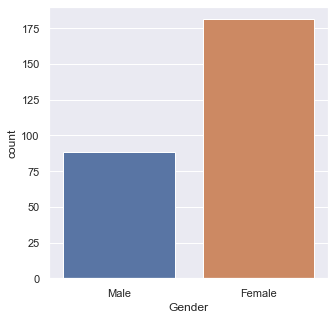

In [14]:
# Visualization of Count of Number of Males & Female Shoppers who shop online.
plt.subplots(figsize=(5,5))
sn.countplot(New_df['Gender'])

#### Observation: We can observe that count of Female=181 & Male=88 maximum number of online shoppers are mostly Females.

<AxesSubplot:xlabel='Age', ylabel='count'>

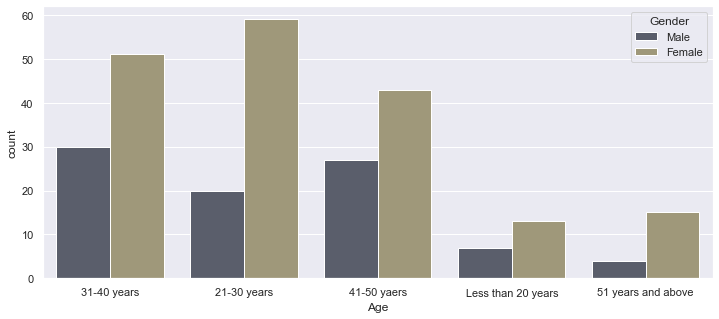

In [15]:
#Displaying the number of male and female customers by age group
plt.subplots(figsize=(12,5))
sn.countplot(x='Age',hue='Gender',data=New_df,palette='cividis')

#### Observation: We can derive following conclusion from the above plot
* Maximum number of Online Shoppers are of age group between 20-50 years.
* Minimum number of Online Shoppers are of age group below 20 years & above 50 years

<AxesSubplot:xlabel='Shopping_city', ylabel='count'>

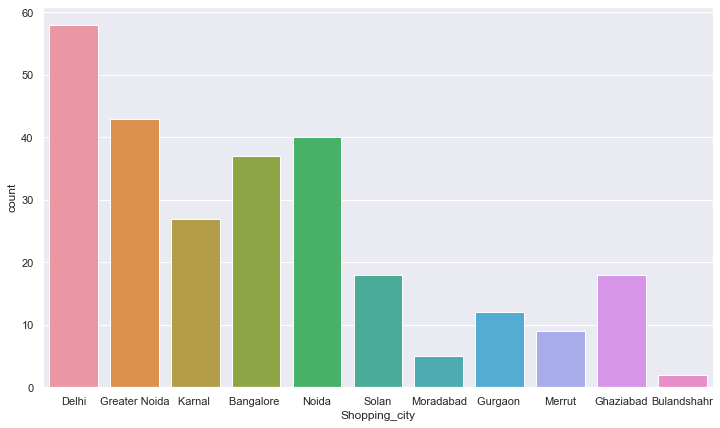

In [16]:
#Count plot on Shopping_city to see the city in which most of the people shop online
plt.subplots(figsize=(12,7))
sn.countplot(New_df['Shopping_city'])

#### Observation: We can derive following conclusion from the above plot
* Most of the e-retail shoppers are from Delhi City from the data provided and least number of shoppers are from Bulandshahr

In [17]:
# Dropping insignigicant columns with less or no usefull data in it
New_df.drop('Pincode', axis=1, inplace=True)
New_df.drop('Screen_size', axis=1, inplace=True)

<AxesSubplot:xlabel='Shopping_online_duration', ylabel='count'>

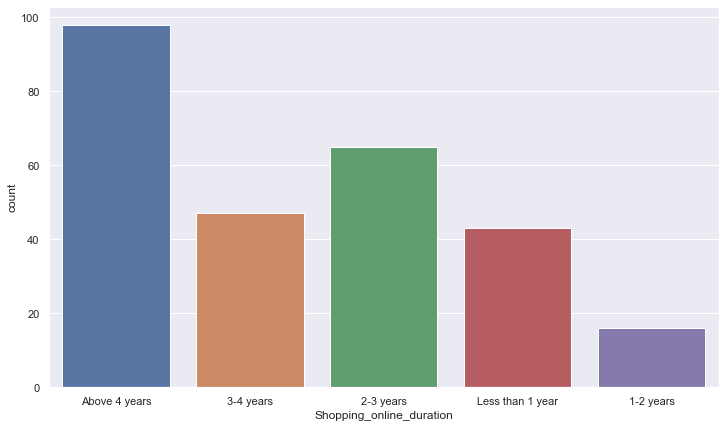

In [18]:
#Count plot on Shopping_online_duration to see how long people are shopping online.
plt.subplots(figsize=(12,7))
sn.countplot(New_df['Shopping_online_duration'])

#### Observation: We can derive following conclusion from the above plot
* Most of the e-retail shoppers are those who are shopping from past 4 years online and least online shopping customers are those who have shopped between 1-2 years

<AxesSubplot:xlabel='Purchases_past_1_year', ylabel='count'>

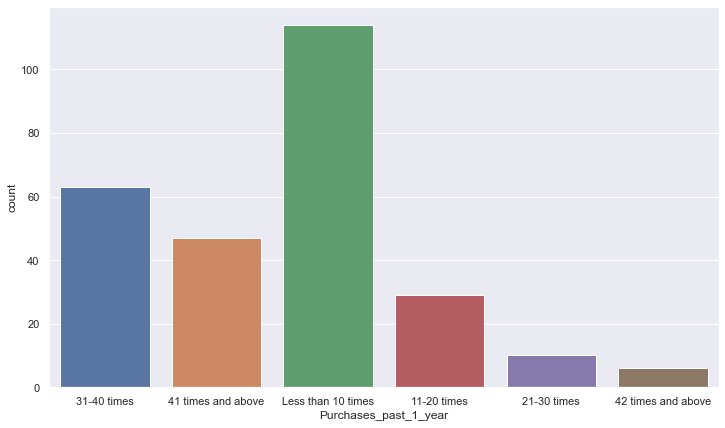

In [19]:
#Count plot on Purchases_past_1_year to see how much people have been shopping online since past 1 year.
plt.subplots(figsize=(12,7))
sn.countplot(New_df['Purchases_past_1_year'])

#### Observation: We can derive following conclusion from the above plot
* We can say that number of customers who shop online more often are Less.
* We can say that number of customers who shop online less often are More

<AxesSubplot:xlabel='Purchases_past_1_year', ylabel='count'>

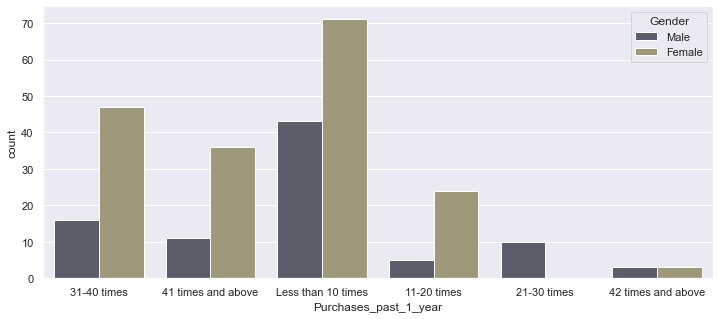

In [20]:
#A plot to show who prefers shopping online more number of times.
plt.subplots(figsize=(12,5))
sn.countplot(x='Purchases_past_1_year',hue='Gender',data=New_df,palette='cividis')

#### Observation: We can derive following conclusion from the above plot
* Majority of the times Females prefer online shopping compared to males

In [21]:
#changing the data values of the Internet_access Column for a better readablity
Internet_access = {'Dail-up':'Dail-up ', 'Wi-Fi':'Wi-Fi', 'Mobile Internet':'Mobile Internet',
 'Mobile internet':'Mobile Internet'}
New_df['Internet_access'].replace(Internet_access, inplace=True)

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: Internet_access, dtype: int64

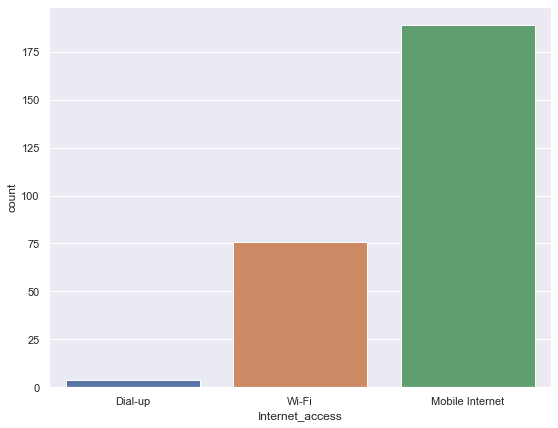

In [22]:
#Count plot on Internet_access to see how long people do online shopping(via which medium).
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Internet_access'])
New_df['Internet_access'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* Maximum number (70%) of e-retail shoppers are seen to be using Mobile internet for Shopping Online.
* Least number of e-retail shoppers are seen to be using Dail-up medium for Shopping Online
* With these 2 points we can also conclude that mostly people shop via phone either app or browser.

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device, dtype: int64

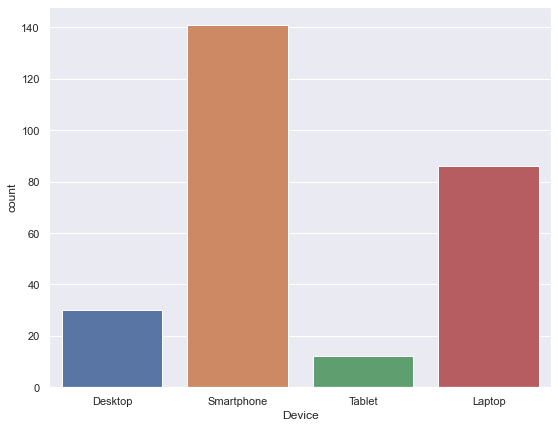

In [23]:
#Count plot on Internet_access to see how long people do online shopping(via which medium).
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Device'])
New_df['Device'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* Maximum number (52%) of e-retail shoppers are seen to be using Smart phone for Shopping Online.
* Secondly after Smart phone we can see most of the users have purchased from Laptop

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64

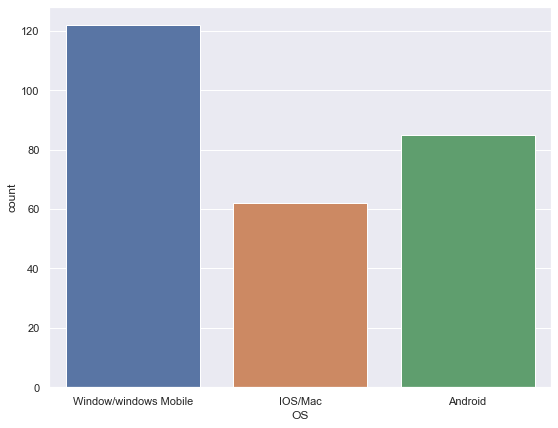

In [24]:
#Count plot on Operating System to see how many are windows/android or IOS users.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['OS'])
New_df['OS'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* Maximum number of e-retail shoppers are seen to be using Windows operating system for Shopping Online.
* Secondly Andriod users and also IOS Users.

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: Browser_used, dtype: int64

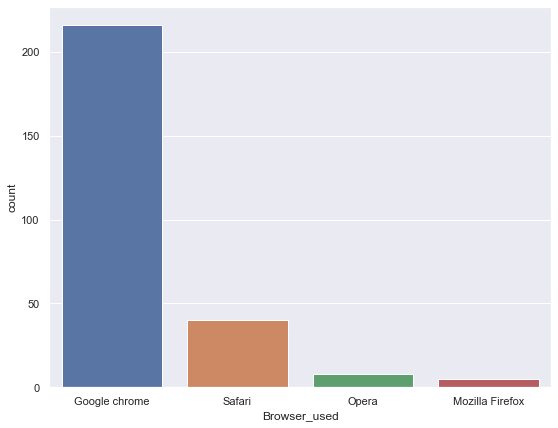

In [25]:
#Count plot on Browser_used to see Which all browsers are mostly used for shopping Online.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Browser_used'])
New_df['Browser_used'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* Maximum number (80%) of e-retail shoppers are seen to be using Google Chrome browser for Shopping Online.
* Mozilla firefox users are least in number.

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel_to_reach_favorite_online_store_first_time, dtype: int64

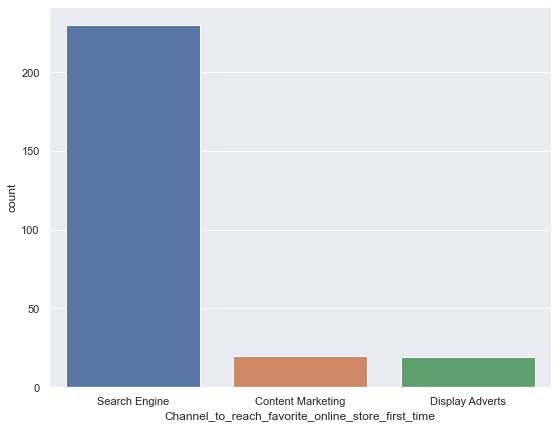

In [26]:
#Count plot on Channel_to_reach_favorite_online_store_first_time to see Which all is the channel mostly used to reach thier favourite store.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Channel_to_reach_favorite_online_store_first_time'])
New_df['Channel_to_reach_favorite_online_store_first_time'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* Maximum number (85%) of e-retail shoppers are seen to have found their favourite store first time from search engine channel.
* The other two channels are content marketing & display adverts which are not much in number.

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: Reached_online_store_via, dtype: int64

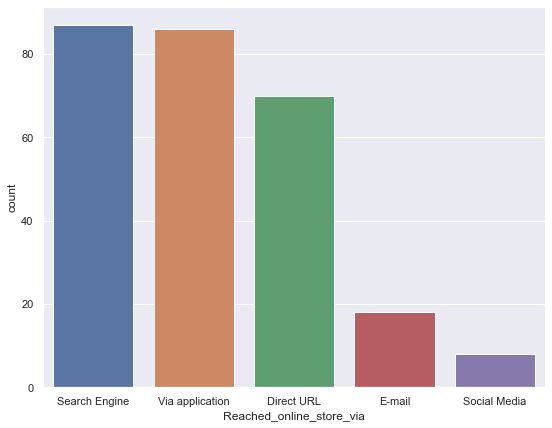

In [27]:
#Count plot on Reached_online_store_via to see Which all channels used to reach their favourite stores.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Reached_online_store_via'])
New_df['Reached_online_store_via'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* We can see many of the customers prefer Search Engine/Application mostly.
* Other channels include Direct URL and some of the least used are Email & Social Media

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: Time_taken_mo_make_purchase_decision_on_e-retail, dtype: int64

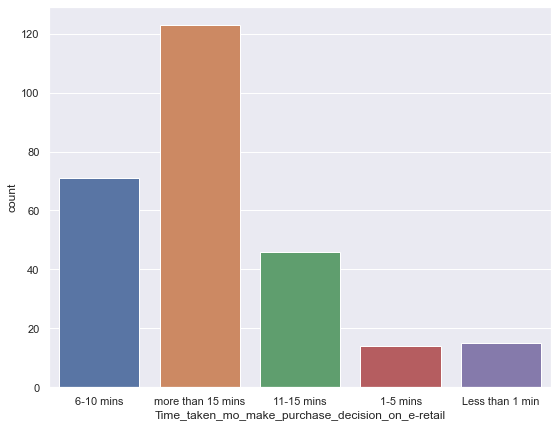

In [28]:
#Count plot on Time_taken_mo_make_purchase_decision_on_e to see how much time a customer spends before makking a purchase.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Time_taken_mo_make_purchase_decision_on_e-retail'])
New_df['Time_taken_mo_make_purchase_decision_on_e-retail'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* We can see most of the customers spend atleast 15 minutes of time before making a purchase.
* There are others who make within a minute, about 6-10 minutes,11-15 minutes but their numbers are not much.

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Preferred_payment_option, dtype: int64

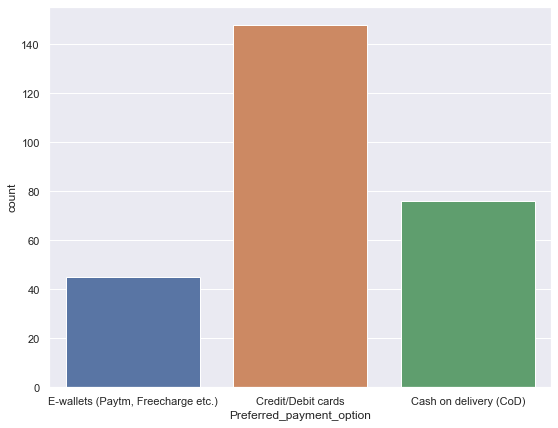

In [29]:
#Count plot on Preferred_payment_option to see how much time a customer spends before makking a purchase.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Preferred_payment_option'])
New_df['Preferred_payment_option'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* Maximum number (55%) of e-retail shoppers are seen to prefer Credit/Debit cards as their payment option.
* Some of the customer also choose cash on delivery option.

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: Frequency_of_abandoning_shopping_cart, dtype: int64

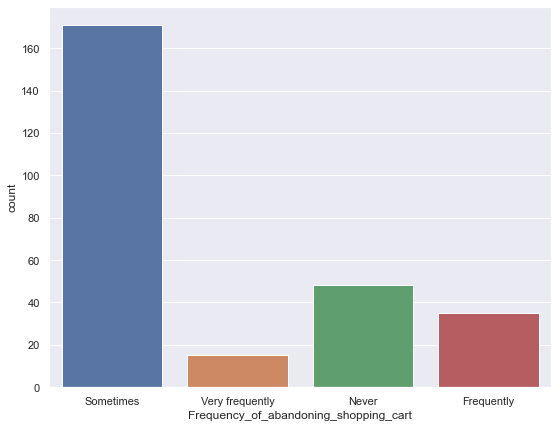

In [30]:
#Count plot on Frequency_of_abandoning_shopping_car to see how often customer adds data into cart and abandons it.
plt.subplots(figsize=(9,7))
sn.countplot(New_df['Frequency_of_abandoning_shopping_cart'])
New_df['Frequency_of_abandoning_shopping_cart'].value_counts()

#### Observation: We can derive following conclusion from the above plot
* From the data provided in the dataset we can see the following analysis
* 66% of the customer are found to have abandoned the shopping cart SOMETIME
* 17% of the customer are found to have abandoned the shopping cart NEVER
* 13% of the customer are found to have abandoned the shopping cart FREQUENTLY
* 0.05% of the customer are found to have abandoned the shopping cart VERY FREQUENTLY

<AxesSubplot:xlabel='Frequency_of_abandoning_shopping_cart', ylabel='count'>

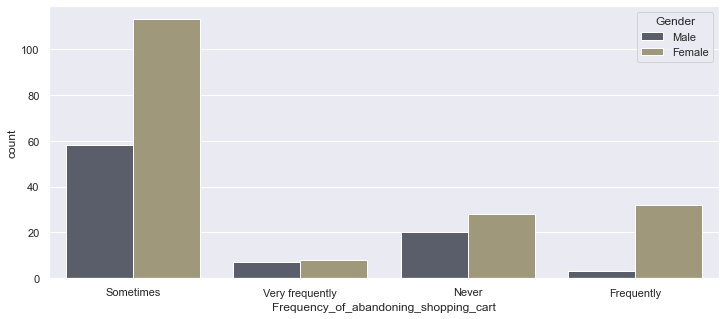

In [31]:
#A plot to show who prefers shopping online more number of times.
plt.subplots(figsize=(12,5))
sn.countplot(x='Frequency_of_abandoning_shopping_cart',hue='Gender',data=New_df,palette='cividis')

* We can see that majority of the customers are females who have abandoned the cart but seeing as the data is imbalance dataset thus the assumption can be partially true that most of females are seen to be abandoning cart more.

In [32]:
new_df11=New_df[['Clarity_On_Product_Listed', 'Easy_Navigation_in_website',
       'Loading_&_processing_speed', 'User_Friendly_Interface',
       'Convenient_Payment_Methods', 'Transaction_Fullfilment_On_Time',
       'Empathy_Towards_Customer', 'Guarantee_of_privacy',
       'Availability_on_several_communication_channels',
       'Online_shopping_gives_monetary_benefit_&_discounts',
       'Shopping_online_is_Fun', 'Online_shopping_is_convenient_&_flexible',
       'Return_&_replacement_policy_is_essential_for_purchase_decision',
       'Online_Shopping_benefits_like_Getting_Access_to_Loyalty_Programs',
       'Displaying_quality_Information_Improves_Customer_Satisfaction',
       'Good_quality_website_or_App_Gives_Customers_more_Satisfaction',
       'Net_Benefit_from_online_shopping_gives_users_more_satisfaction',
       'Trust_is_essential_for_user_satisfaction',
       'Offers_wide_variety_of_listed_product_in_several_category',
       'Provision_of_complete_&_relevant_product_information',
       'More_Monetary_savings',
       'Convenience_of_patronizing_the_online_retailer',
       'Shopping_on_website_gives_sense_of_adventure',
       'Shopping_on_your_preferred_e-tailer_enhances_your_social_status',
       'More_gratification_feelings_shopping_on_favorite_e-tailer',
       'Shopping_on_the_website_helps_you_fulfill_certain_roles',
       'Value_for_money_spent']]

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: Clarity_On_Product_Listed, dtype: int64




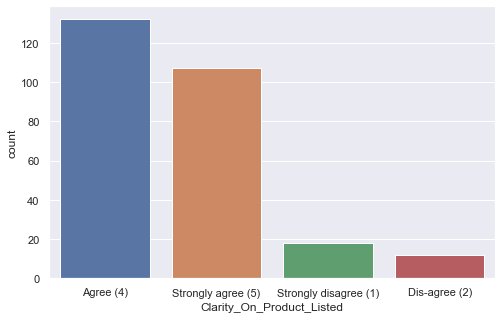

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Easy_Navigation_in_website, dtype: int64




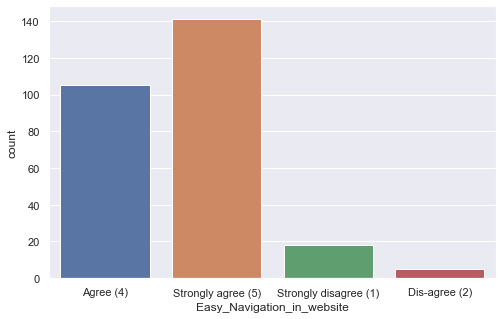

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: Loading_&_processing_speed, dtype: int64




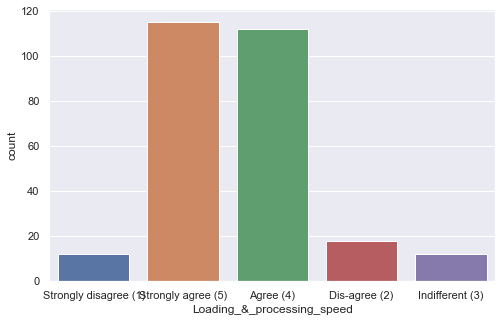

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User_Friendly_Interface, dtype: int64




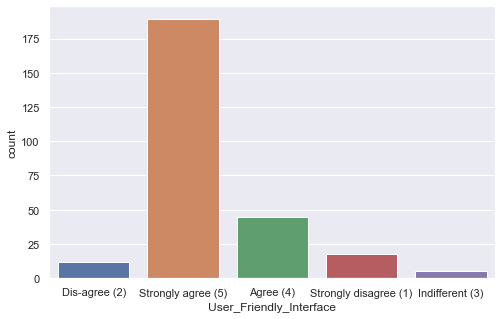

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convenient_Payment_Methods, dtype: int64




Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Transaction_Fullfilment_On_Time, dtype: int64




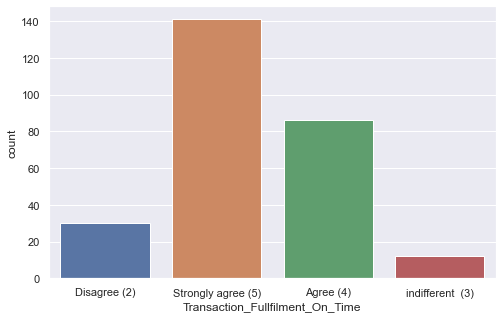

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Empathy_Towards_Customer, dtype: int64




Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Guarantee_of_privacy, dtype: int64




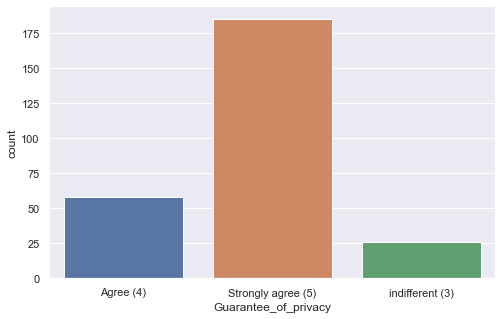

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Availability_on_several_communication_channels, dtype: int64




Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Online_shopping_gives_monetary_benefit_&_discounts, dtype: int64




Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Shopping_online_is_Fun, dtype: int64




Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: Online_shopping_is_convenient_&_flexible, dtype: int64




Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return_&_replacement_policy_is_essential_for_purchase_decision, dtype: int64




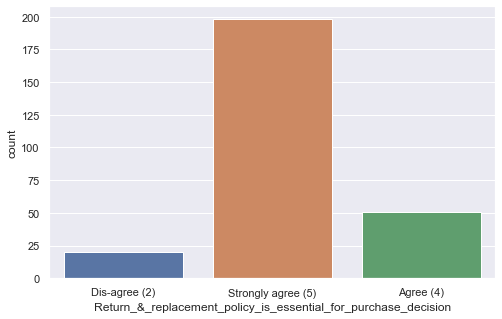

Strongly agree (5)       115
indifferent (3)           64
Agree (4)                 64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: Online_Shopping_benefits_like_Getting_Access_to_Loyalty_Programs, dtype: int64




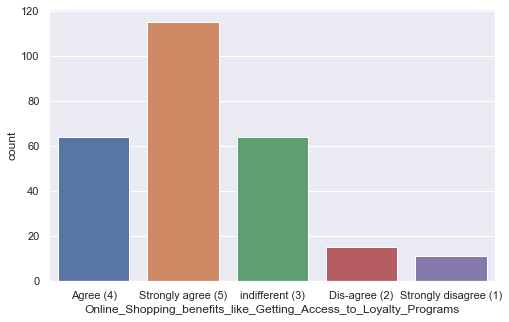

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: Displaying_quality_Information_Improves_Customer_Satisfaction, dtype: int64




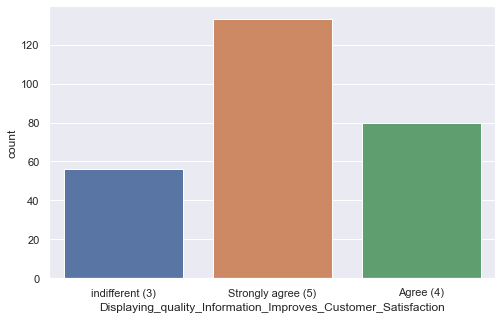

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: Good_quality_website_or_App_Gives_Customers_more_Satisfaction, dtype: int64




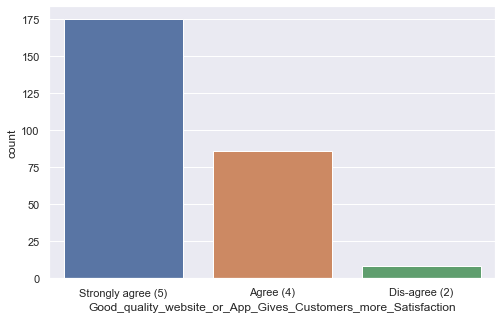

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net_Benefit_from_online_shopping_gives_users_more_satisfaction, dtype: int64




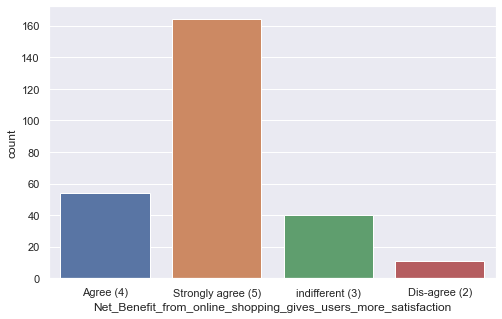

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: Trust_is_essential_for_user_satisfaction, dtype: int64




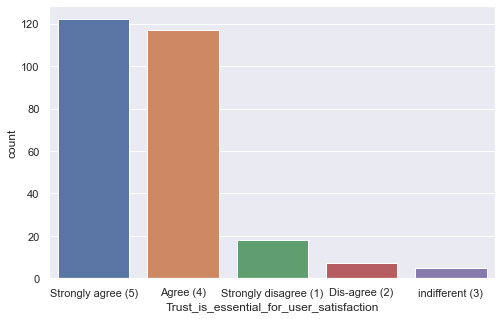

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: Offers_wide_variety_of_listed_product_in_several_category, dtype: int64




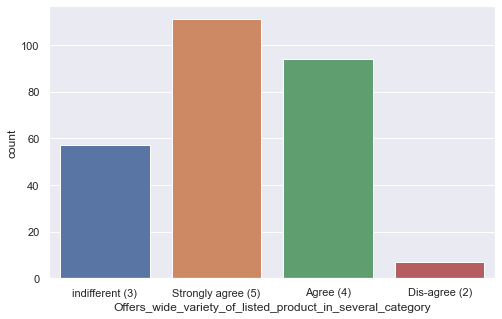

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: Provision_of_complete_&_relevant_product_information, dtype: int64




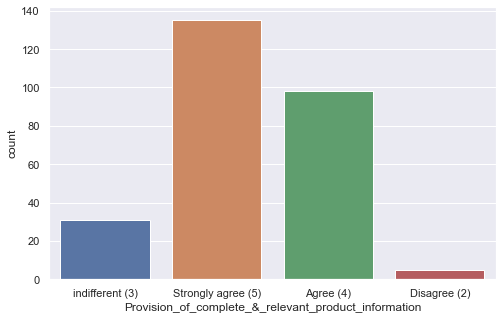

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: More_Monetary_savings, dtype: int64




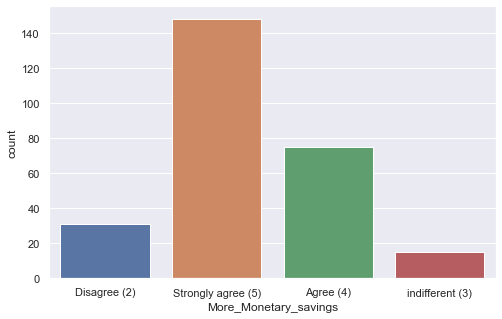

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: Convenience_of_patronizing_the_online_retailer, dtype: int64




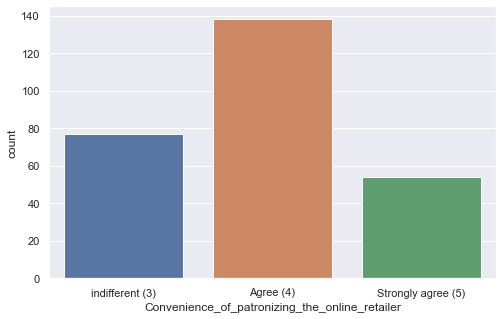

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: Shopping_on_website_gives_sense_of_adventure, dtype: int64




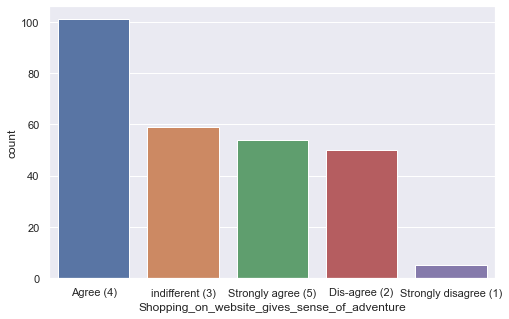

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: Shopping_on_your_preferred_e-tailer_enhances_your_social_status, dtype: int64




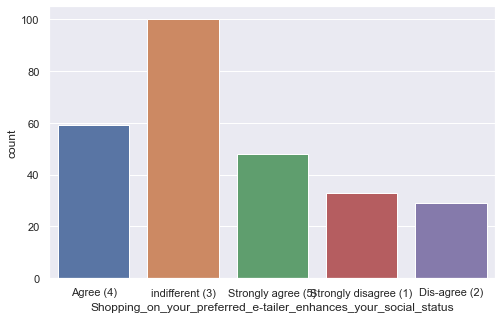

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: More_gratification_feelings_shopping_on_favorite_e-tailer, dtype: int64




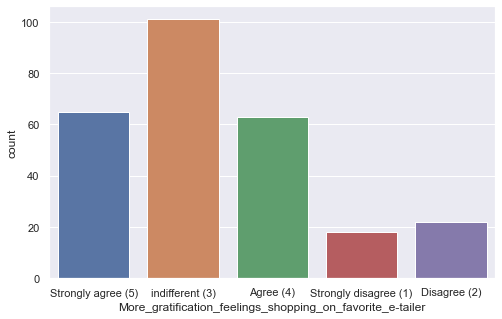

indifferent (3)          88
Agree (4)                88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: Shopping_on_the_website_helps_you_fulfill_certain_roles, dtype: int64




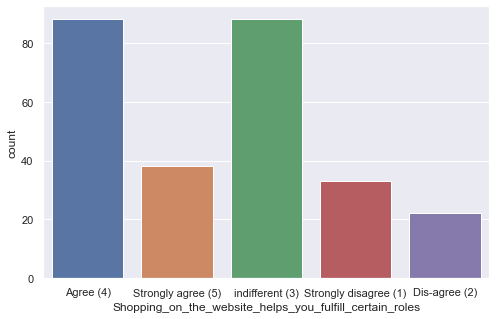

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: Value_for_money_spent, dtype: int64




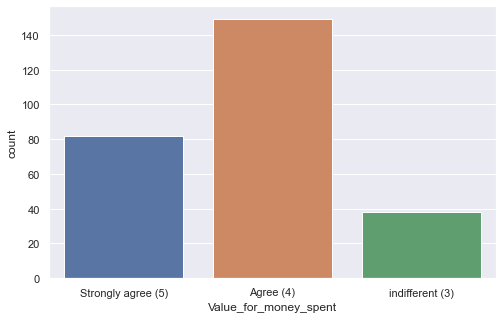

In [33]:
#countplot for all the columns with ratings
for col in new_df11:
    plt.subplots(figsize=(8,5))
    print(New_df[col].value_counts())
    print('\n')
    sn.countplot(new_df11[col])
    plt.show()

#### According to the Survey when certain quesions were asked to be rated out of 5 these were the following results gathered from the customers

* Question: Clarity_On_Product_Listed
* Analysis: About 49% of the customers agree and 39% Strongly agree that clarity on the product listed matters very much online shopping.


* Question: Easy_Navigation_in_website
* Analysis: About 52% of the customers Strongly agree and 39% agree that Easy Navigation in website very much helpful in online shopping.


* Question: Loading_&_processing_speed
* Analysis: About 43% of the customers Strongly agree and 42% agree that Loading & processing speed plays an important role in online shopping.


* Question: User_Friendly_Interface
* Analysis: About 70% of the customers Strongly agree and 16% agree that User Friendly Interface plays an important role in online shopping.


* Question: Convenient_Payment_Methods
* Analysis: About 59% of the customers Strongly agree and 30% agree that Convenient Payment Methods very much helpful in online shopping.


* Question: Transaction_Fullfilment_On_Time
* Analysis: About 52% of the customers Strongly agree and 32% agree that Transaction Fullfilment On Time  plays an important role in online shopping.


* Question: Empathy_Towards_Customer
* Analysis: About 72% of the customers Strongly agree and 17% agree that Empathy Towards Customer plays an crucial role in online shopping.


* Question: Guarantee_of_privacy
* Analysis: About 69% of the customers Strongly agree and 22% agree that Guarantee of privacy  plays crucial role in online shopping.


* Question: Availability_on_several_communication_channels
* Analysis: About 55% of the customers Strongly agree and 35% agree that Availability on several communication channels plays important role in online shopping.


* Question: Shopping_online_is_Fun
* Analysis: About 32% of the customers Strongly agree but 28% feel indifferent that Shopping online is fun.
* This shows that the customers mostly do not enjoy online shopping very much.


* Question: Online_shopping_is_convenient_&_flexible
* Analysis: About 54% of the customers Strongly agree and 29% agree that Online shopping is convenient & flexible.



* Question: Return_&_replacement_policy_is_essential_for_purchase_decision
* Analysis: About 54% of the customers Strongly agree and 29% agree that Return & replacement policy is essential for making online purchase decision.


* Question: Online_Shopping_benefits_like_Getting_Access_to_Loyalty_Programs
* Analysis: About 43% of the customers Strongly agree and 24% agree that Online Shopping benefits like Getting Access to Loyalty Programs.


* Question: Displaying_quality_Information_Improves_Customer_Satisfaction
* Analysis: About 49% of the customers Strongly agree and 30% agree that Displaying quality Information Improves Customer Satisfaction in online shopping.


* Question: Good_quality_website_or_App_Gives_Customers_more_Satisfaction
* Analysis: About 65% of the customers Strongly agree and 32% agree that Good quality website or App Gives Customers more Satisfaction in online shopping.


* Question: Net_Benefit_from_online_shopping_gives_users_more_satisfaction
* Analysis: About 61% of the customers Strongly agree and 20% agree that Net Benefit from online shopping gives users more satisfaction in online shopping.


* Question: Trust_is_essential_for_user_satisfaction
* Analysis: About 45% of the customers Strongly agree and 43% agree that Trust is essential for user satisfaction in online shopping.


* Question: Offers_wide_variety_of_listed_product_in_several_category
* Analysis: About 41% of the customers Strongly agree and 35% agree also 22% of the customers feel indifferent that Offers wide variety of listed product in several category plays an important role in online shopping.


* Question: Provision_of_complete_&_relevant_product_information
* Analysis: About 50% of the customers Strongly agree and 36% agree that Provision of complete & relevant product information is very essential in online shopping.


* Question: More_Monetary_savings
* Analysis: About 54% of the customers Strongly agree and 28% agree that More Monetary savings is very essential in online shopping.


* Question: Convenience_of_patronizing_the_online_retailer
* Analysis: About 51% of the customers Strongly agree and 29% agree but 20% feel indiffernet that Convenience of patronizing the online retailer plays an important role in online shopping.



* Question: Shopping_on_website_gives_sense_of_adventure
* Analysis: About 38% of the customers Strongly agree but 20% disagree and 22% feel indiffernet that Shopping on website gives sense of adventure.


* Question: Shopping_on_your_preferred_e-tailer_enhances_your_social_status
* Analysis: About 12% of the customers Strongly disagree and 22% agree but 37% feel indiffernet that Shopping on your preferred e-tailer enhances your social status.


* Question: More_gratification_feelings_shopping_on_favorite_e-tailer
* Analysis: About 24% of the customers Strongly agree and 23% agree but 38% feel indiffernet that More gratification feelings shopping on favorite e-tailer.


* Question: Shopping_on_the_website_helps_you_fulfill_certain_roles
* Analysis: About 12% of the customers Strongly disagree and 33% agree but 33% feel indiffernet that Shopping on the website helps you fulfill certain roles.


* Question: Value_for_money_spent
* Analysis: About 30% of the customers Strongly disagree and 55% agree but 14% feel indiffernet that Value for money spent.

In [34]:
#Creating a new data frame for analysis
new_df12=New_df[['List_all_the_online_retailers_you_have_shopped_from',
       'Easy_to_use_website_or_application',
       'Visual_appealing_web-page_layout', 'Wild_variety_of_product_on_offer',
       'List_e-tailer_Displaying_relevant_information_of_products',
       'E-tailer_with_Fast_loading_website_&_application',
       'Reliability_of_the_website_or_application',
       'Quickness_to_complete_purchase',
       'Availability_of_several_payment_options', 'Speedy_order_delivery',
       'Privacy_on_customer_information',
       'Security_of_customer_financial_information',
       'Perceived_Trustworthiness', 'Multi-channel_assistance',
       'Longer_time_to_get_logged_in',
       'Longer_time_in_displaying_graphics_and_photos',
       'Late_price_declaration', 'Longer_page_loading_time',
       'Limited_mode_of_payment_on_most_products', 'Longer_delivery_period',
       'Change_in_website_or_Application_design',
       'Frequent_disruption_while_moving_from_page_to_page',
       'Website_is_as_efficient_as_before',
       'Recommend_online_Indian_retailer_to_a_friend']]

Column Name: List_all_the_online_retailers_you_have_shopped_from 

             val  count
0      Amazon.in    269
1   Flipkart.com    221
2   Snapdeal.com    182
3      Paytm.com    150
4     Myntra.com    146


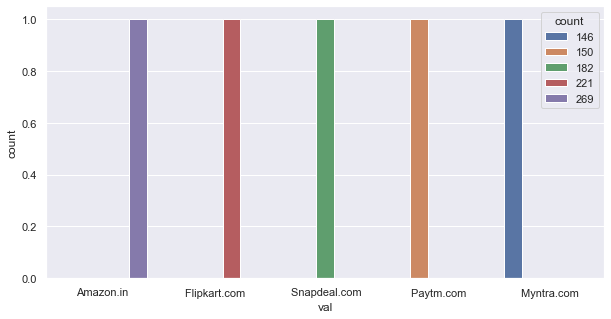



Column Name: Easy_to_use_website_or_application 

             val  count
0      Amazon.in    249
1   Flipkart.com    193
2     Myntra.com    147
3   Snapdeal.com    130
4      Paytm.com    113
5      Paytm.com     12
6   Flipkart.com      8


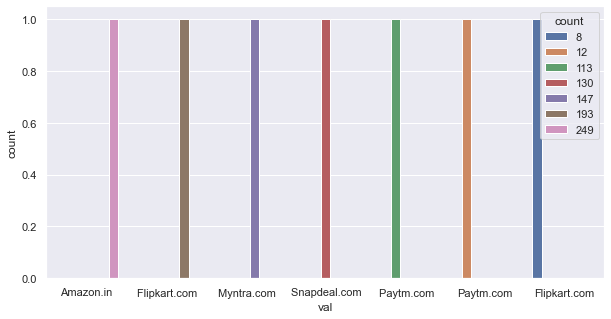



Column Name: Visual_appealing_web-page_layout 

             val  count
0      Amazon.in    227
1   Flipkart.com    148
2     Myntra.com    100
3      Paytm.com     67
4   Snapdeal.com     61
5   Flipkart.com     27
6     Myntra.com     15


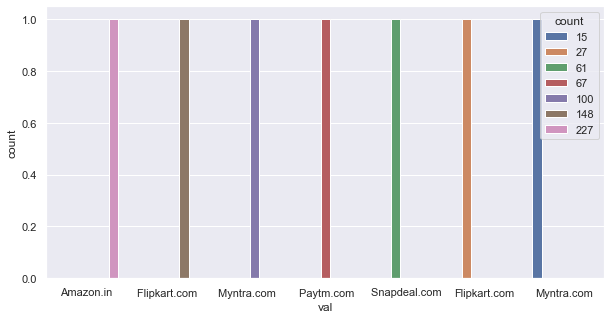



Column Name: Wild_variety_of_product_on_offer 

             val  count
0      Amazon.in    220
1   Flipkart.com    157
2     Myntra.com     49
3   Flipkart.com     27
4     Myntra.com     15
5   Snapdeal.com     14
6      Paytm.com     13
7      Paytm.com      7


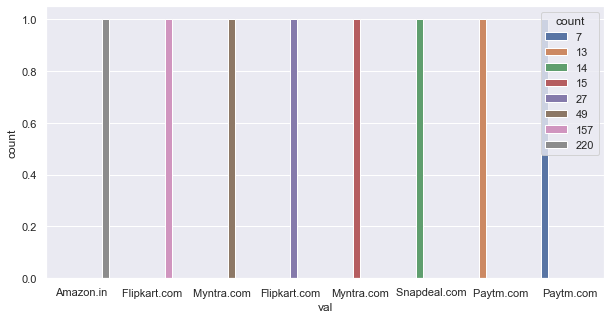



Column Name: List_e-tailer_Displaying_relevant_information_of_products 

             val  count
0      Amazon.in    238
1   Flipkart.com    175
2     Myntra.com     64
3      Paytm.com     59
4   Snapdeal.com     47
5   Flipkart.com     19
6   Snapdeal.com     12


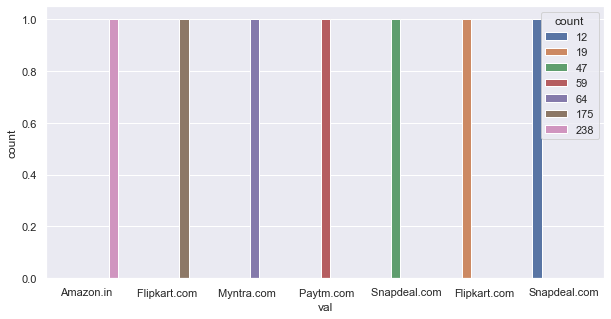



Column Name: E-tailer_with_Fast_loading_website_&_application 

             val  count
0      Amazon.in    249
1   Flipkart.com    154
2      Paytm.com     99
3     Myntra.com     74
4   Snapdeal.com     69
5   Snapdeal.com     12
6   Flipkart.com      8


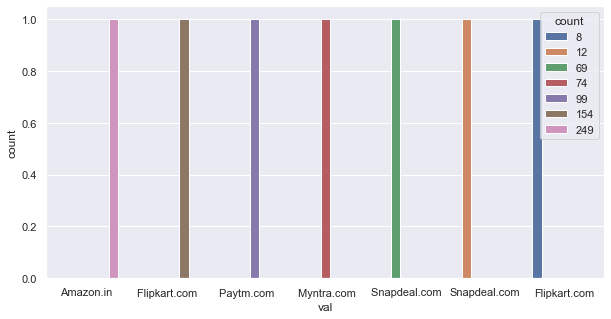



Column Name: Reliability_of_the_website_or_application 

             val  count
0      Amazon.in    227
1   Flipkart.com    131
2      Paytm.com     84
3     Myntra.com     49
4   Snapdeal.com     45
5   Flipkart.com     15
6     Myntra.com     15
7      Paytm.com     12


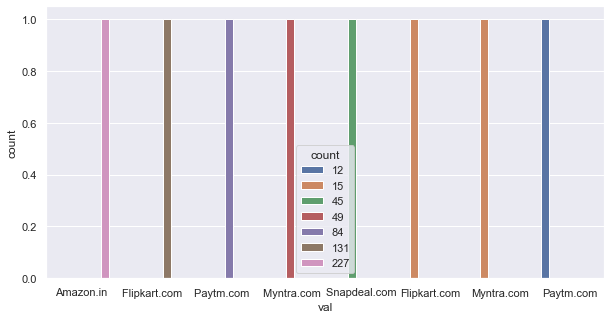



Column Name: Quickness_to_complete_purchase 

             val  count
0     Amazon.com    215
1   Flipkart.com    129
2      Paytm.com     82
3     Myntra.com     79
4   Flipkart.com     29
5       Snapdeal     29
6      Paytm.com     25


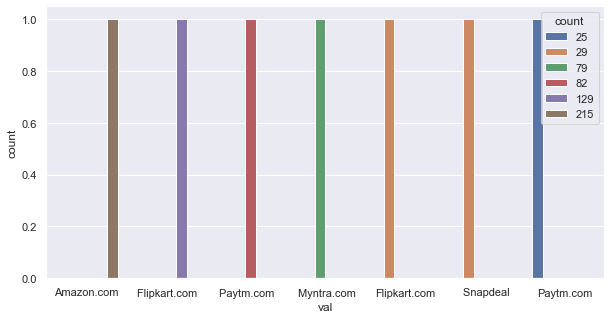



Column Name: Availability_of_several_payment_options 

             val  count
0      Amazon.in    215
1   Flipkart.com    181
2     Myntra.com    132
3   Snapdeal.com     90
4      Patym.com     50
5      Patym.com     32
6   Flipkart.com     22


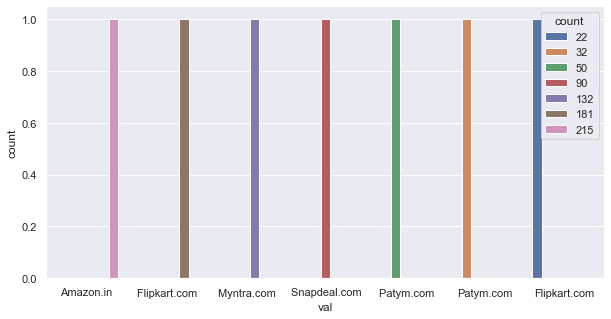



Column Name: Speedy_order_delivery 

             val  count
0      Amazon.in    240
1   Flipkart.com    133
2   Snapdeal.com     50
3   Flipkart.com     29
4     Myntra.com     29


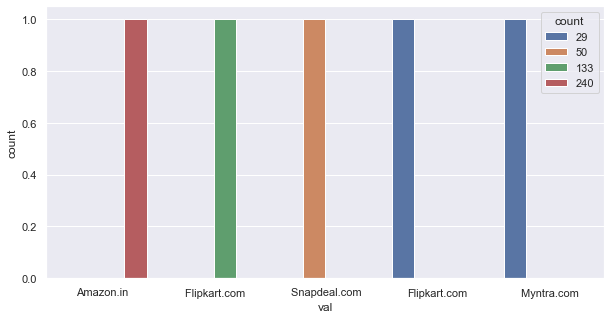



Column Name: Privacy_on_customer_information 

             val  count
0      Amazon.in    221
1   Flipkart.com    135
2     Myntra.com     63
3      Paytm.com     50
4   Snapdeal.com     45
5      Paytm.com     18
6   Flipkart.com     15
7     Myntra.com     15


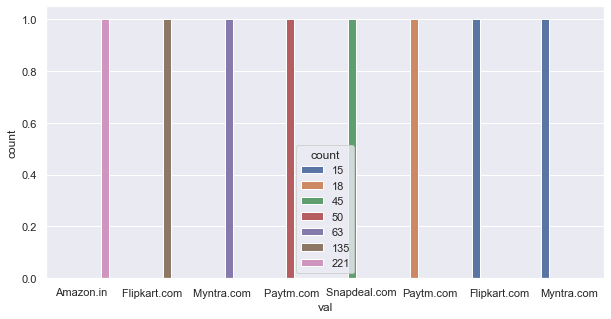



Column Name: Security_of_customer_financial_information 

             val  count
0      Amazon.in    206
1   Flipkart.com    116
2   Snapdeal.com    100
3     Myntra.com     76
4      Paytm.com     73
5   Flipkart.com     33
6     Myntra.com     15
7      Paytm.com     15


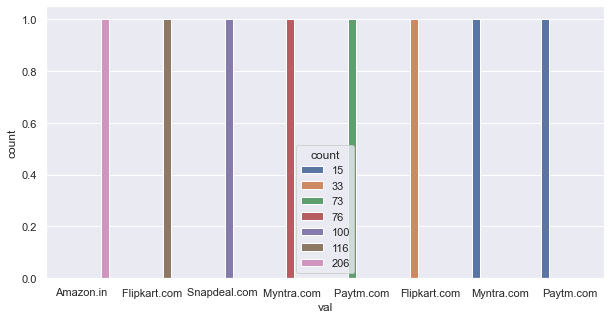



Column Name: Perceived_Trustworthiness 

             val  count
0      Amazon.in    227
1   Flipkart.com    116
2   Snapdeal.com     74
3     Myntra.com     73
4   Flipkart.com     27
5      Paytm.com     24
6     Myntra.com     15


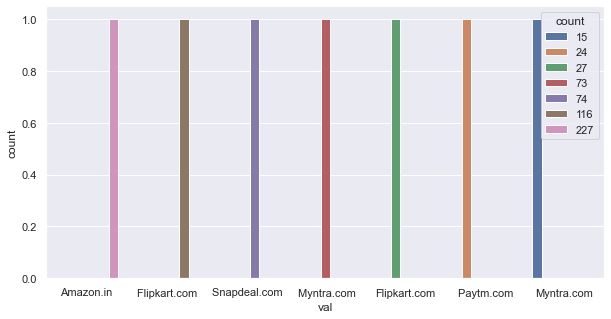



Column Name: Multi-channel_assistance 

             val  count
0      Amazon.in    229
1   Flipkart.com    128
2     Myntra.com     91
3       Snapdeal     87
4     Myntra.com     20
5      Paytm.com     13
6      Paytm.com     12
7   Flipkart.com      8


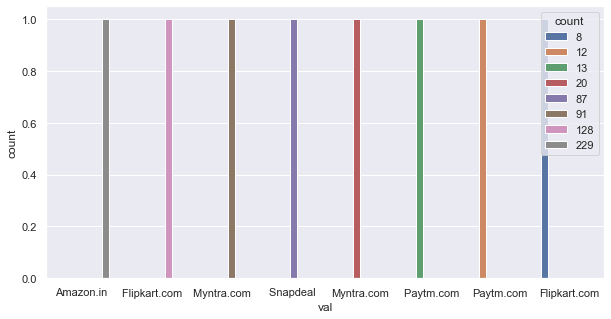



Column Name: Longer_time_to_get_logged_in 

             val  count
0      Amazon.in    135
1   Flipkart.com     67
2   Snapdeal.com     42
3      Paytm.com     39
4      Paytm.com     38
5   Flipkart.com     36
6     Myntra.com     35
7   Snapdeal.com     25


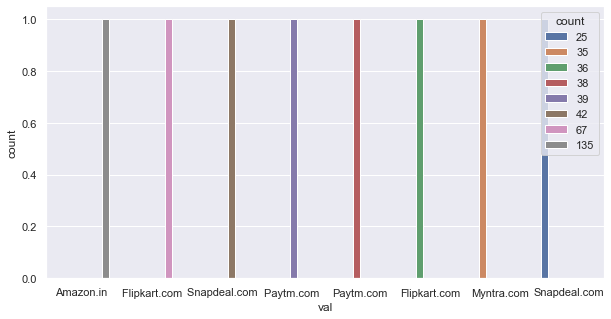



Column Name: Longer_time_in_displaying_graphics_and_photos 

             val  count
0      Amazon.in    126
1   Flipkart.com     60
2     Myntra.com     60
3   Snapdeal.com     58
4   Flipkart.com     34
5   Snapdeal.com     34
6      Paytm.com     15
7     Myntra.com     14
8      Paytm.com     13


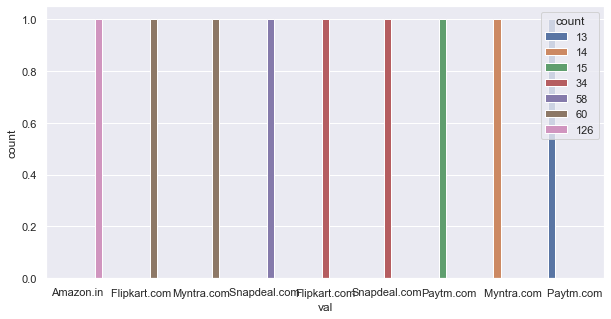



Column Name: Late_price_declaration 

             val  count
0     Myntra.com     75
1      Paytm.com     59
2      Amazon.in     56
3   snapdeal.com     41
4   Flipkart.com     38
5      Paytm.com     13
6   snapdeal.com      7
7   Flipkart.com      5


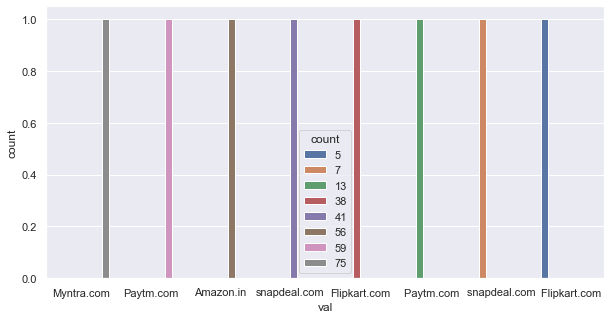



Column Name: Longer_page_loading_time 

             val  count
0      Paytm.com     74
1      Amazon.in     68
2     Myntra.com     61
3   Flipkart.com     43
4   Snapdeal.com     40
5   Snapdeal.com     23
6      Paytm.com     20
7   Flipkart.com     18
8     Myntra.com      7


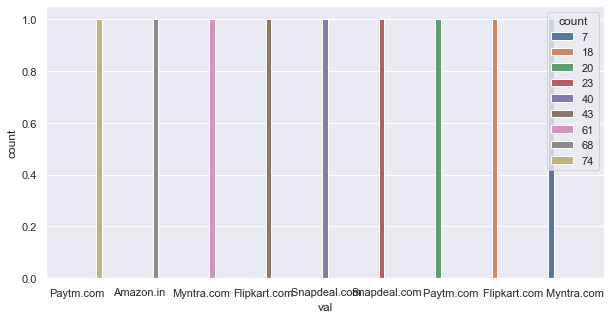



Column Name: Limited_mode_of_payment_on_most_products 

             val  count
0      Amazon.in    104
1   Snapdeal.com     87
2      Paytm.com     40
3   Flipkart.com     31
4   Flipkart.com     29
5   Snapdeal.com     22
6      Paytm.com     13
7     Myntra.com      7


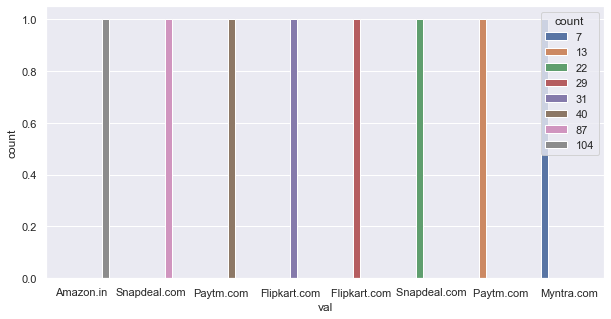



Column Name: Longer_delivery_period 

             val  count
0      Paytm.com     98
1   Snapdeal.com     64
2   Flipkart.com     44
3      Amazon.in     37
4     Myntra.com     26
5   Snapdeal.com     26


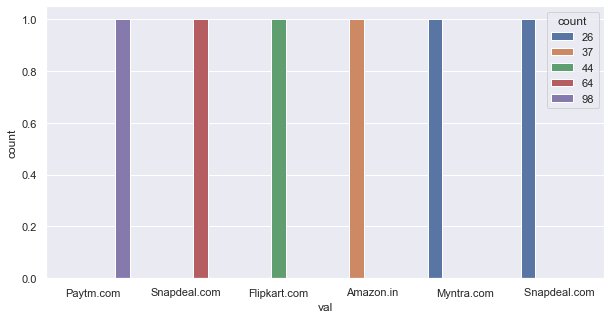



Column Name: Change_in_website_or_Application_design 

             val  count
0      Amazon.in    141
1      Paytm.com     63
2   Flipkart.com     45
3     Myntra.com     30
4   Flipkart.com     27
5   Snapdeal.com      8
6     Myntra.com      7


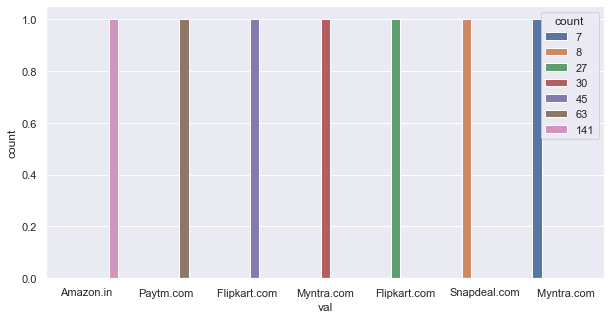



Column Name: Frequent_disruption_while_moving_from_page_to_page 

             val  count
0      Amazon.in     78
1     Myntra.com     66
2   Snapdeal.com     49
3      Paytm.com     39
4   Flipkart.com     37
5   Flipkart.com     25
6   Snapdeal.com     25


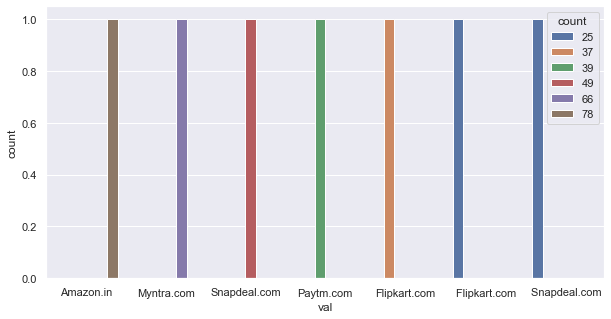



Column Name: Website_is_as_efficient_as_before 

             val  count
0      Amazon.in    182
1   Flipkart.com     70
2   Flipkart.com     47
3      Paytm.com     43
4      Paytm.com     15
5     Myntra.com     14
6   Snapdeal.com     14
7   Snapdeal.com     11


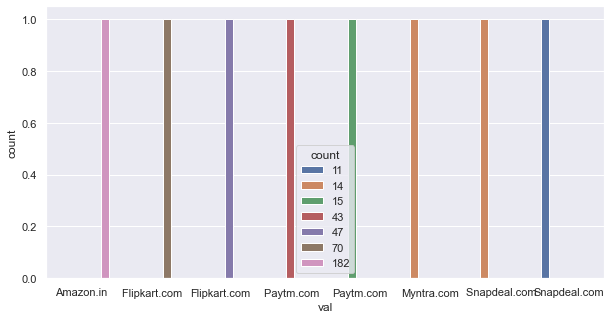



Column Name: Recommend_online_Indian_retailer_to_a_friend 

             val  count
0      Amazon.in    219
1   Flipkart.com     77
2     Myntra.com     76
3   Flipkart.com     50
4      Paytm.com     44
5   snapdeal.com     11


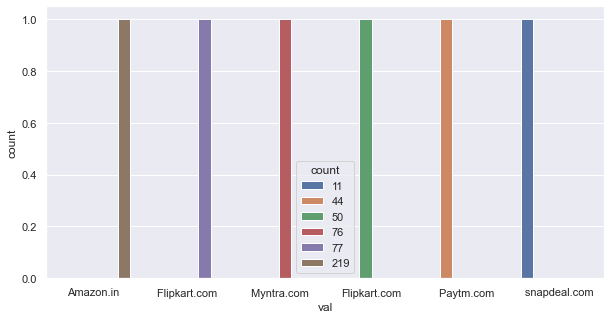

In [35]:
#Collection of e-retails count for each question asked.
from collections import Counter
N = 269
for col in new_df12:
    print("Column Name:",col,'\n')
    for i in col:
        new_df3 = (new_df12[col].str.split(',', expand=True)
         .stack()
         .value_counts()
         .head(N)
         .rename_axis('val')
         .reset_index(name='count'))
    print(new_df3)
    plt.subplots(figsize=(10,5))
    sn.set(style='darkgrid')
    sn.countplot(x='val',hue='count',data=new_df3)
    plt.show()
    print('\n')

* Question: List_all_the_online_retailers_you_have_shopped_from 
* Analysis: 100% of customers have opted Amazon.in & 82% have opted Flipkart.com least number of customers have opted Myntra.com which is 54%.

    
* Question: Easy_to_use_website_or_application  
* Analysis: 93% of customers have opted Amazon.in & 75% have opted Flipkart.com least number of customers have opted Paytm.com which is 46%.


* Question: Visual_appealing_web-page_layout 
* Analysis: 84% of customers have opted Amazon.in & 65% have opted Flipkart.com least number of customers have opted Paytm.com which is 24%


* Question: Wild_variety_of_product_on_offer  
* Analysis: 82% of customers have opted Amazon.in & 68% have opted Flipkart.com least number of customers have opted Snapdeal.com which is 54%


* Question: List_e-tailer_Displaying_relevant_information_of_products 
* Analysis: 88% of customers have opted Amazon.in & 72% have opted Flipkart.com least number of customers have opted Snapdeal.com & Paytm.com which is 22%


* Question: tailer_with_Fast_loading_website_&_application 
* Analysis: 93% of customers have opted Amazon.in & 60% have opted Flipkart.com least number of customers have opted Myntra.com which is 28%


* Question: Reliability_of_the_website_or_application 
* Analysis: 84% of customers have opted Amazon.in & 54% have opted Flipkart.com least number of customers have opted Snapdeal.com which is 17%


* Question: Quickness_to_complete_purchase  
* Analysis: 80% of customers have opted Amazon.in & 59% have opted Flipkart.com least number of customers have opted Snapdeal.com which is 10%


* Question: Availability_of_several_payment_options   
* Analysis: 80% of customers have opted Amazon.in & 59% have opted Flipkart.com least number of customers have opted Snapdeal.com which is 10%


* Question: Speedy_order_delivery    
* Analysis: 89% of customers have opted Amazon.in & 60% have opted Flipkart.com least number of customers have opted Snapdeal.com which is 10%


* Question: Privacy_on_customer_information   
* Analysis: 83% of customers have opted Amazon.in & 56% have opted Flipkart.com least number of customers have opted Snapdeal.com which is 17%


* Question: Security_of_customer_financial_information    
* Analysis: 77% of customers have opted Amazon.in & 55% have opted Flipkart.com least number of customers have opted Paytm.com which is 32%


* Question: Perceived_Trustworthiness 
* Analysis: 77% of customers have opted Amazon.in & 55% have opted Flipkart.com least number of customers have opted Paytm.com which is 9%


* Question: Multi-channel_assistance 
* Analysis: 85% of customers have opted Amazon.in & 51% have opted Flipkart.com least number of customers have opted Paytm.com which is 9%


* Question: Longer_time_to_get_logged_in  
* Analysis: 50% of customers have opted Amazon.in & 38% have opted Flipkart.com least number of customers have opted Myntra.com which is 13%


* Question: Longer_time_in_displaying_graphics_and_photos 
* Analysis: 47% of customers have opted Amazon.in & 35% have opted Flipkart.com least number of customers have opted Paytm.com which is 10%


* Question: Late_price_declaration  
* Analysis: 28% of customers have opted Myntra.in & 27% have opted Paytm.com least number of customers have opted Snapdeal.com which is 15%


* Question: Longer_page_loading_time 
* Analysis: 35% of customers have opted Paytm.in & 25% have opted Amazon.com & Myntra.com least number of customers have opted Snapdeal.com which is 23%


* Question: Limited_mode_of_payment_on_most_products 
* Analysis: 41% of customers have opted Snapdeal.com & 39% have opted Amazon.com & Myntra.com least number of customers have opted Myntra.com which is 2%


* Question: Longer_delivery_period 
* Analysis: 36% of customers have opted Paytm.com & 33% have opted Snapdeal.com & Myntra.com least number of customers have opted Myntra.com which is 10%


* Question: Change_in_website_or_Application_design 
* Analysis: 52% of customers have opted Amazon.in & 27% have opted Snapdeal.com & Flipkart.com least number of customers have opted Snapdeal.com which is 3%


* Question: Frequent_disruption_while_moving_from_page_to_page 
* Analysis: 29% of customers have opted Amazon.in & 28% have opted Flipkart.com least number of customers have opted Paytm.com which is 14%



* Question: Website_is_as_efficient_as_before 
* Analysis: 68% of customers have opted Amazon.in & 43% have opted Flipkart.com least number of customers have opted Myntra.com which is 5%


* Question: Recommend_online_Indian_retailer_to_a_friend 
* Analysis: 81% of customers have opted Amazon.in & 47% have opted Snapdeal.com & Flipkart.com least number of customers have opted Snapdeal.com which is 4%

### Final Conclusion:
#### * Majority of the users prefer "Easy_to_use_website_or_application/User_Friendly_Interface" hence this can add a value in retaining customers
#### * "List_e-tailer_Displaying_relevant_information_of_products" This is also on of the important factors when it comes to retaining customers
#### * Majority of the users feel very great when treated with more empathy "Empathy_Towards_Customer" hence this can add a value in retaining customers
#### * Users shop more as there is high "Guarantee_of_privacy" during online shopping
#### * "Speedy_order_delivery" plays important role in retaining customers
#### * "Multi-channel_assistance" gives more options users and hence should be opted by e-retailers
#### * "Quickness_to_complete_purchase/Availability_of_several_payment_options" can add a value in retaining customers
#### * "Reliability_of_the_website_or_application" pays major role as this improves the trust of the users shopping online
#### * "e-retailer_with_Fast_loading_website_&_application" have more advantage as this is one of the important factors in online shopping again and again.
#### * "Net_Benefit_from_online_shopping_gives_users_more_satisfaction" this gives customer a great sense of satisfaction